### Load the data:

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
df = pd.read_csv('../data/01_data_cleaned.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Holiday_Event,day,month,year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,Not a holiday,5,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,Super Bowl Week,12,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,Not a holiday,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,Not a holiday,26,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,Not a holiday,5,3,2010


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Store          6435 non-null   int64  
 1   Date           6435 non-null   object 
 2   Weekly_Sales   6435 non-null   float64
 3   Holiday_Flag   6435 non-null   int64  
 4   Temperature    6435 non-null   float64
 5   Fuel_Price     6435 non-null   float64
 6   CPI            6435 non-null   float64
 7   Unemployment   6435 non-null   float64
 8   Holiday_Event  6435 non-null   object 
 9   day            6435 non-null   int64  
 10  month          6435 non-null   int64  
 11  year           6435 non-null   int64  
dtypes: float64(5), int64(5), object(2)
memory usage: 603.4+ KB


Separating numeric and categorical features:

In [5]:
num_features = df.select_dtypes(include=[np.number]).columns.tolist()

cat_features = df.select_dtypes(include=['object']).columns.tolist()

print(num_features)
print(cat_features)

['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'day', 'month', 'year']
['Date', 'Holiday_Event']


In [6]:
cat_features.remove('Date')
num_features = [col for col in num_features if col not in ['day', 'month', 'year', 'Holiday_Flag']]

cat_features.append('Holiday_Flag')

# 1. Univariate Analysis:

In [7]:
def plot_num(cols):
    for col in cols:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
        
        sns.histplot(df[col], kde=True, ax=ax1)
        ax1.set_title(f"Distribution of {col}")
        
        sns.boxplot(x=df[col], ax=ax2)
        ax2.set_title(f"Boxplot of {col}")
        
        plt.tight_layout()
        plt.show()
        

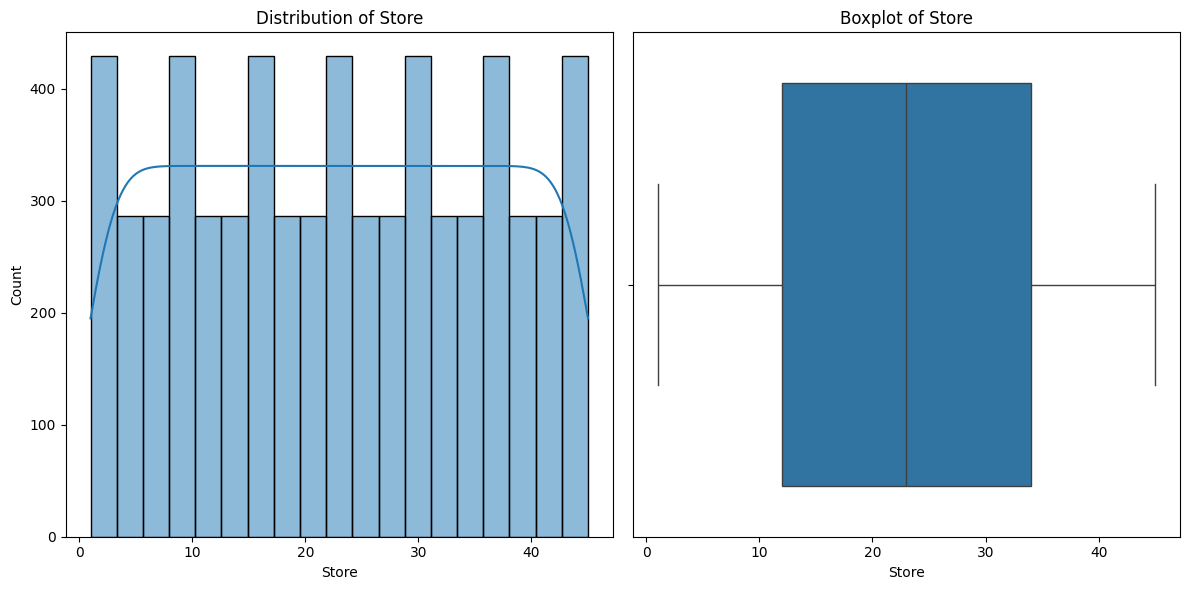

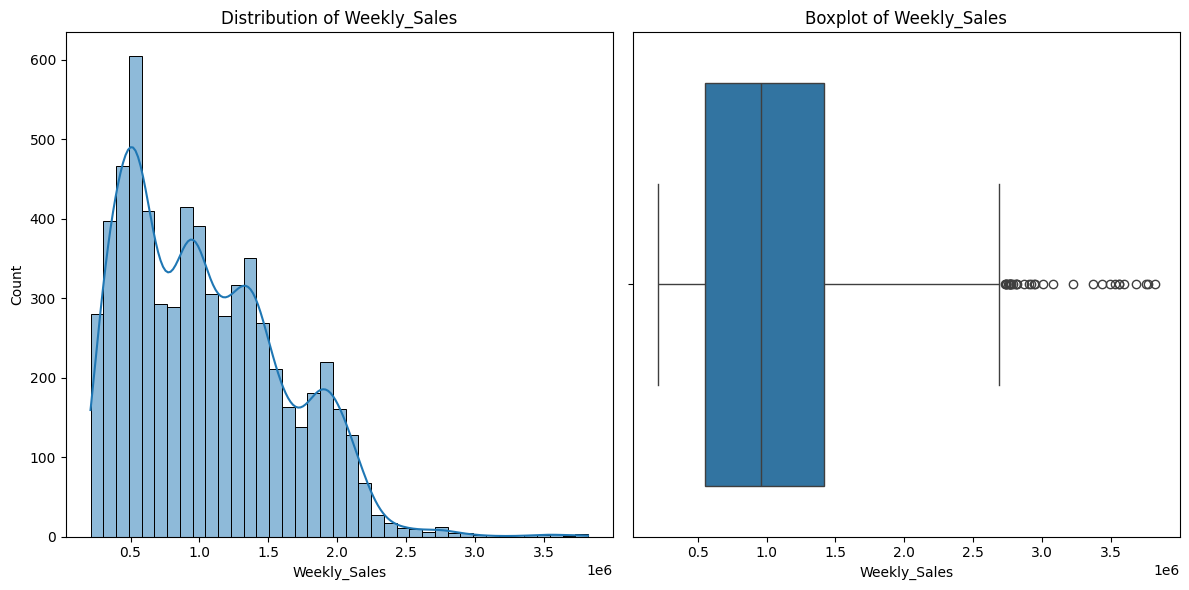

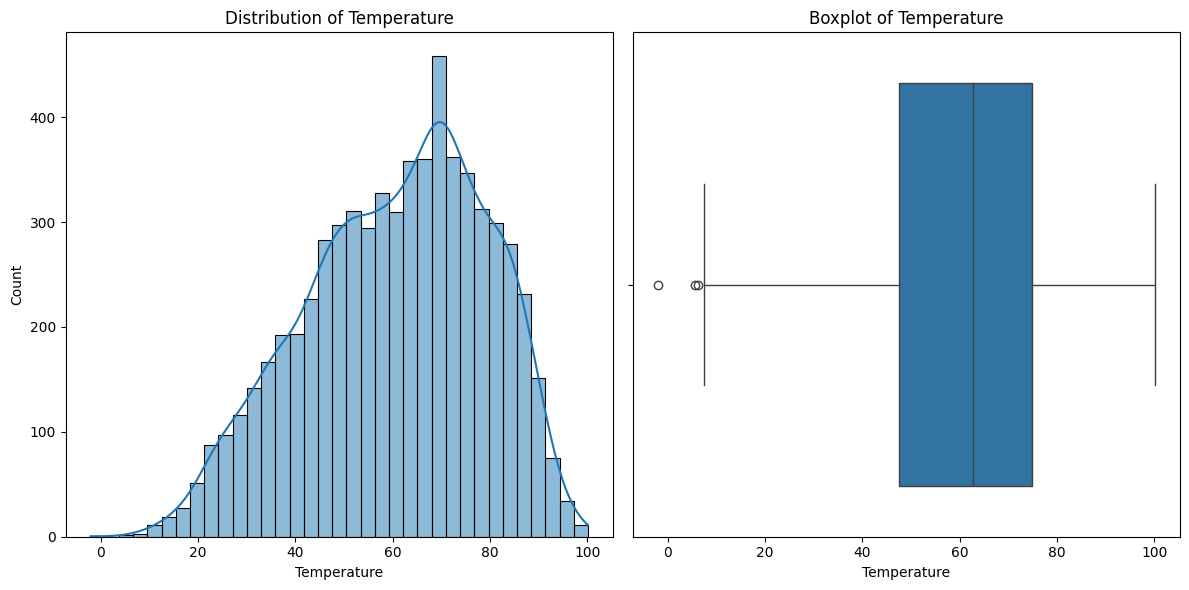

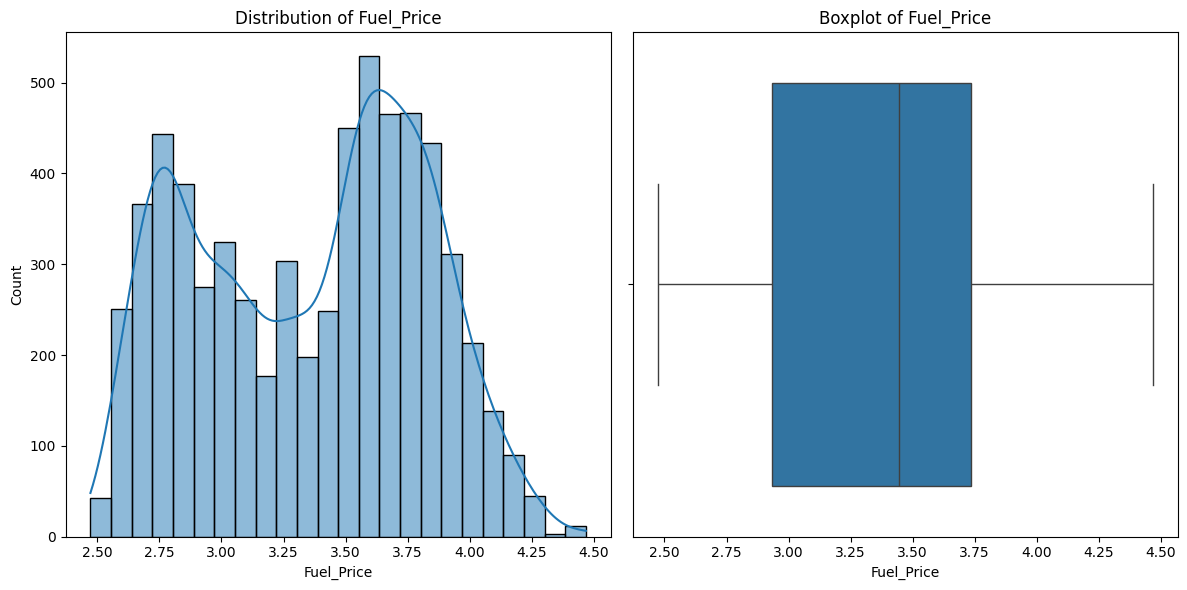

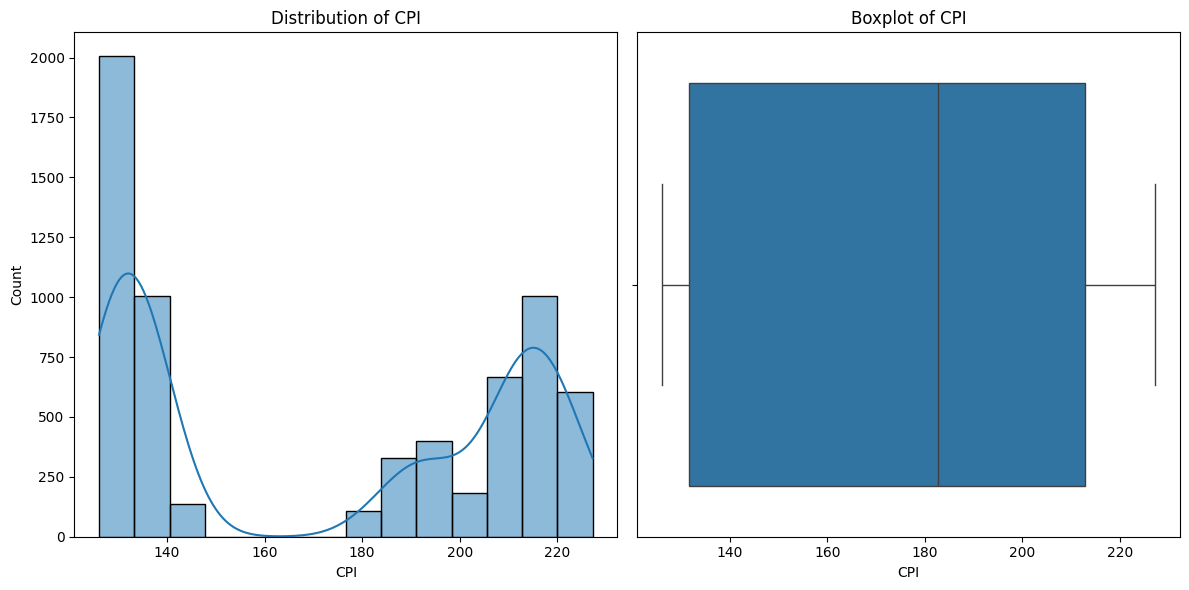

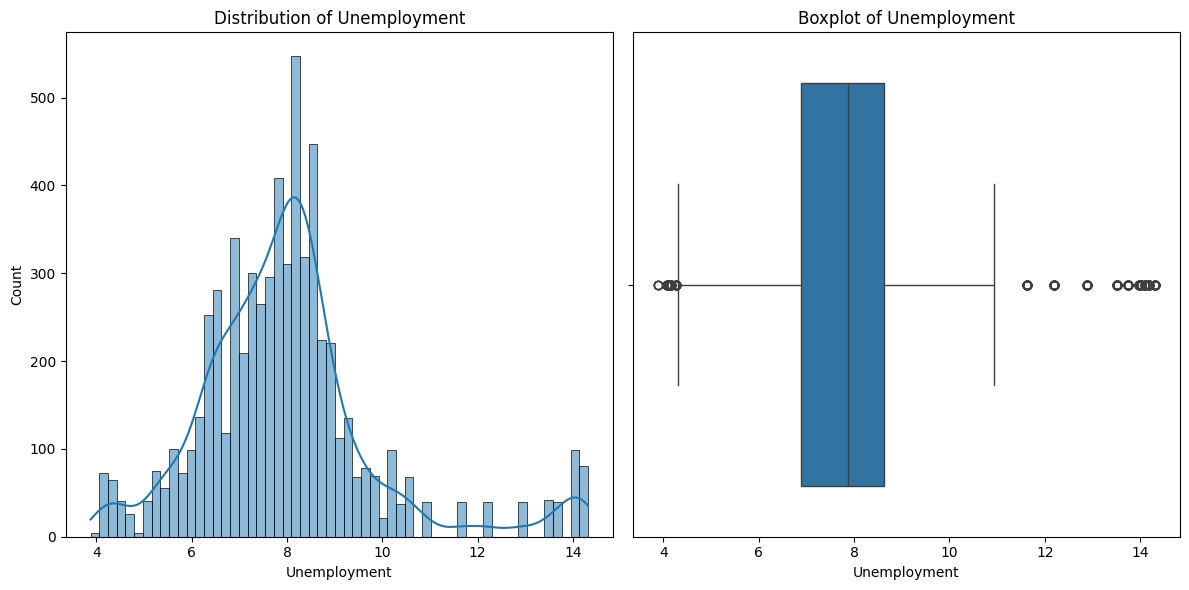

In [8]:
plot_num(num_features)

In [9]:
def plot_cat(cols):
    for col in cols:
        plt.figure(figsize=(10, 5))
        sns.countplot(data=df, x=col)
        plt.title(f"Count of {col}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

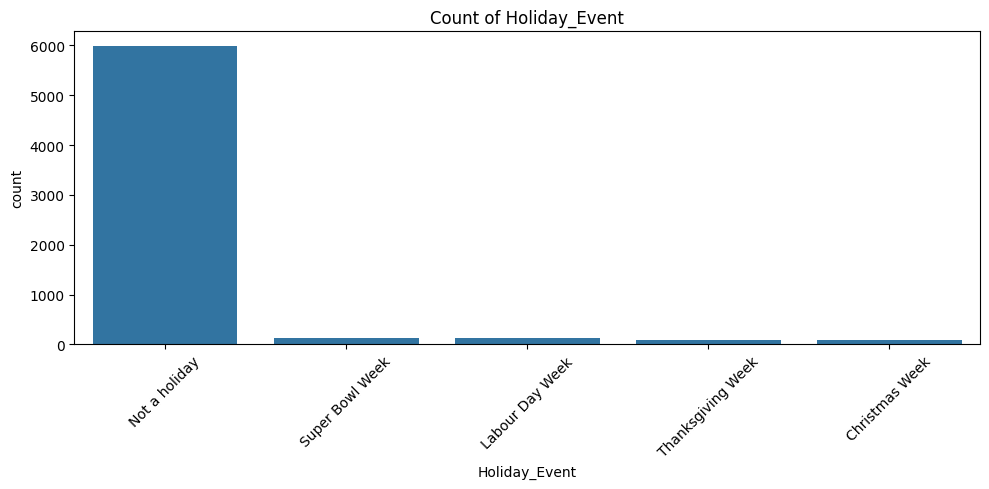

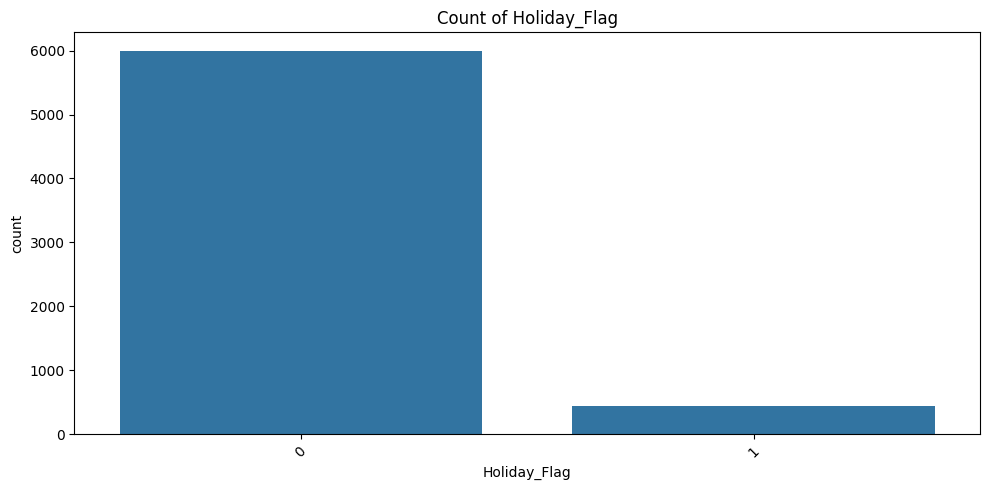

In [10]:
plot_cat(cat_features)

As expected the given holidays are very less compared to regular days.

# 2. Multivariate Analysis:

In [11]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Holiday_Event', 'day', 'month',
       'year'],
      dtype='object')

In [12]:
store_sales = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=True).reset_index()
store_sales.head()

,Store,Weekly_Sales
0,33,37160221.96
1,44,43293087.84
2,5,45475688.90
3,36,53412214.97
4,38,55159626.42


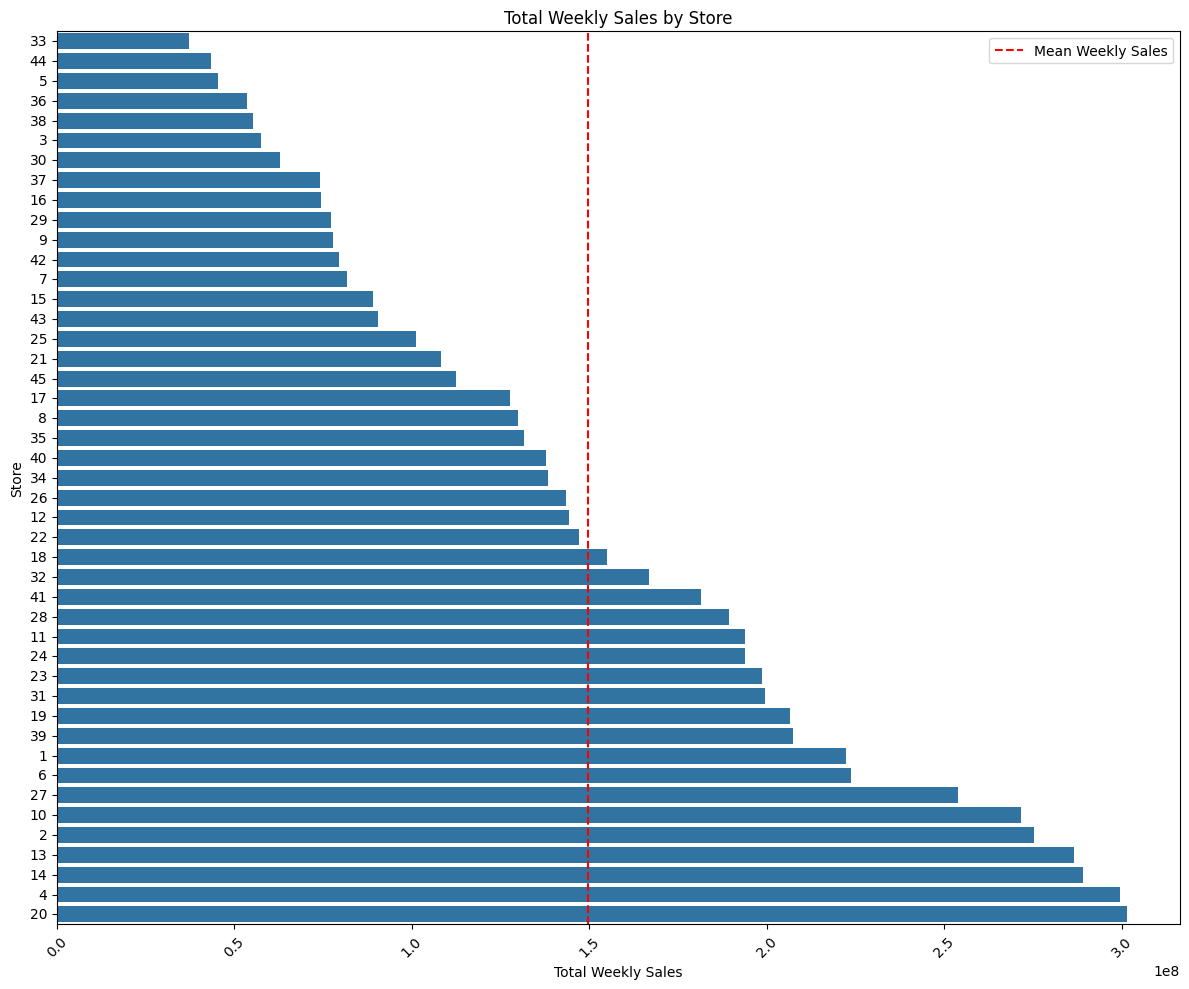

In [13]:
plt.figure(figsize=(12, 10))
sns.barplot(data=store_sales, y='Store', x='Weekly_Sales', orient='h', order=store_sales['Store'], dodge=False)
plt.title('Total Weekly Sales by Store')
plt.xlabel('Total Weekly Sales')
plt.ylabel('Store')
plt.xticks(rotation=45)
plt.yticks(fontsize=10, va='center')
plt.axvline(store_sales['Weekly_Sales'].mean(), color='red', linestyle='--', label='Mean Weekly Sales')
plt.legend()
plt.tight_layout()
plt.show()

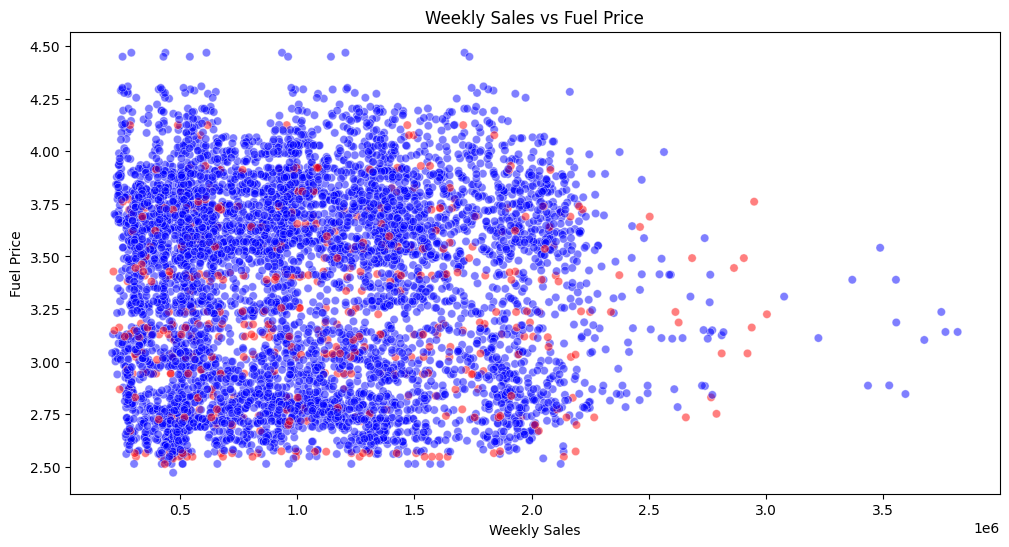

In [14]:
plt.figure(figsize=(12, 6))

sns.scatterplot(data=df, x='Weekly_Sales', y='Fuel_Price', color=df['Holiday_Flag'].map({0: 'blue', 1: 'red'}), alpha=0.5)
plt.xlabel('Weekly Sales')
plt.ylabel('Fuel Price')
plt.title('Weekly Sales vs Fuel Price')
plt.show()

Most weekly sales greater than $3M was actually on non-holiday weeks.

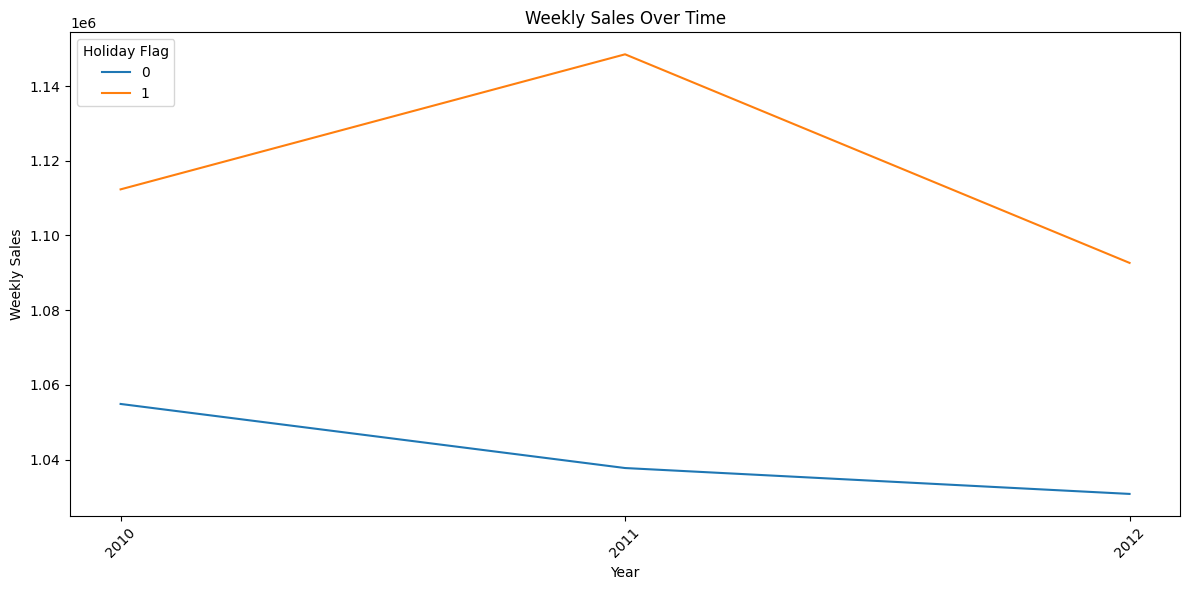

In [15]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=df, x='year', y='Weekly_Sales', hue='Holiday_Flag', errorbar=None)
plt.xlabel('Year')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales Over Time')
plt.xticks(ticks=df['year'].unique(), rotation=45, labels=df['year'].unique())
plt.legend(title='Holiday Flag', loc='upper left')
plt.tight_layout()
plt.show()


In [16]:
sales = df.groupby('year')['Weekly_Sales'].mean()
holiday_sales = df.groupby('year')['Holiday_Flag'].sum()

sales_holiday = pd.DataFrame({'mean_sales': sales, 'holiday_count': holiday_sales}).reset_index()
sales_holiday

,year,mean_sales,holiday_count
0,2010,1.059670e+06,180
1,2011,1.046239e+06,180
2,2012,1.033660e+06,90


As expected total average sales are more on holidays than non-holiday weeks.

2011 had the most average sales. However, the overall trend suggests that the sales is actually decreasing from 2010 to 2012. And I think it's because we have data only till Oct in 2012 and not of Nov and Dec. I'm assuming that for the entire year the sales would be comparable to 2011.

<Figure size 1200x600 with 0 Axes>

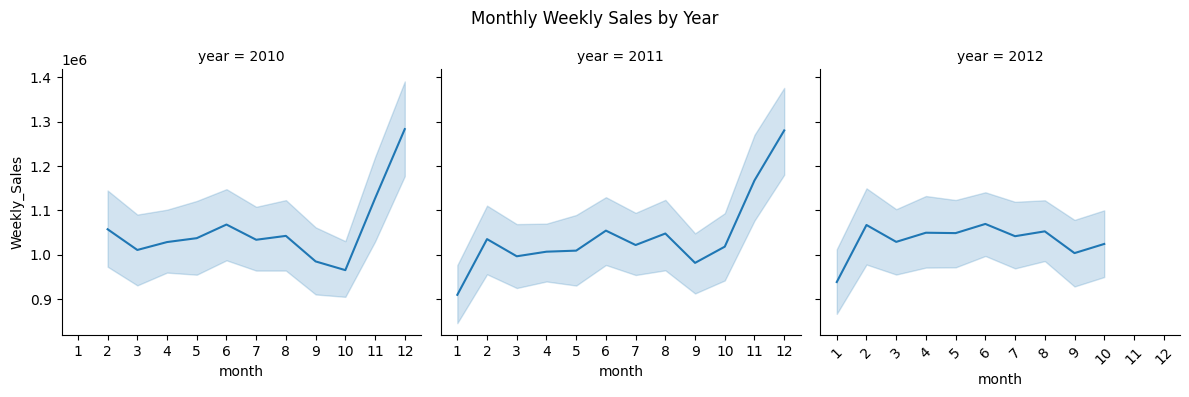

In [17]:
plt.figure(figsize=(12, 6))

grid = sns.FacetGrid(df, col='year', col_wrap=3, height=4)
grid.map(sns.lineplot, 'month', 'Weekly_Sales')

plt.xticks(ticks=df['month'].unique(), rotation=45, labels=df['month'].unique())

grid.figure.suptitle('Monthly Weekly Sales by Year')
grid.figure.tight_layout()
plt.show()

We can see a trend here, that at the initial months the sales is less, then it rises and stabalizes. However, it increases drastically after Oct.

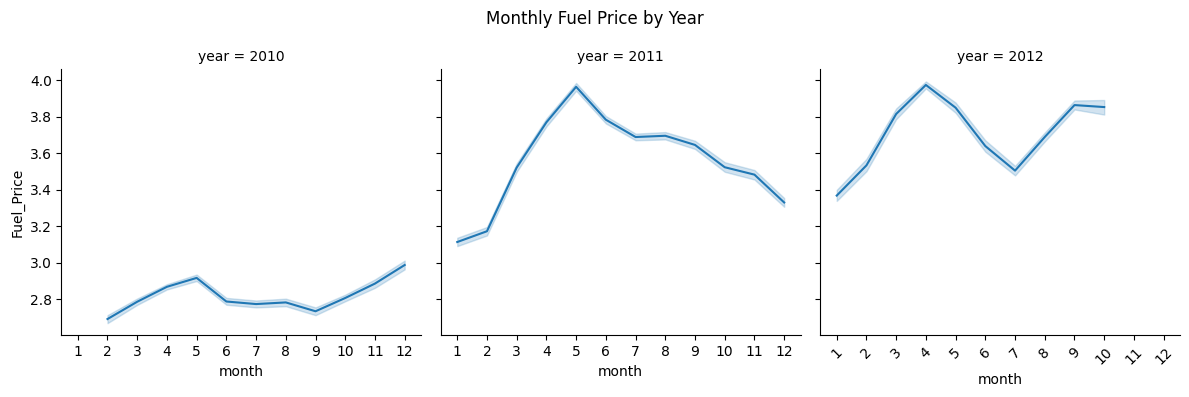

In [18]:
grid = sns.FacetGrid(df, col='year', col_wrap=3, height=4)
grid.map(sns.lineplot, 'month', 'Fuel_Price')
plt.xticks(ticks=df['month'].unique(), rotation=45, labels=df['month'].unique())

grid.figure.suptitle('Monthly Fuel Price by Year')
grid.figure.tight_layout()
plt.show()

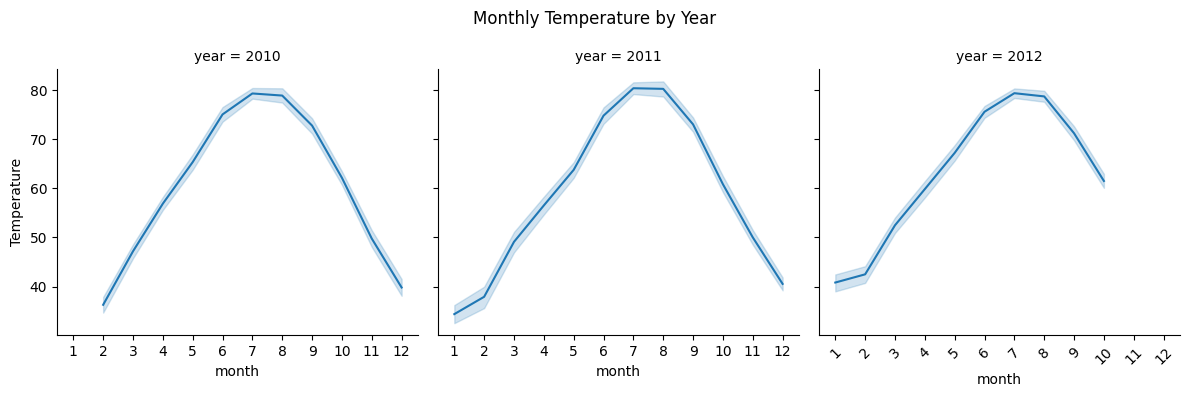

In [19]:
grid = sns.FacetGrid(df, col='year', col_wrap=3, height=4)
grid.map(sns.lineplot, 'month', 'Temperature')
plt.xticks(ticks=df['month'].unique(), rotation=45, labels=df['month'].unique())

grid.figure.suptitle('Monthly Temperature by Year')
grid.figure.tight_layout()
plt.show()

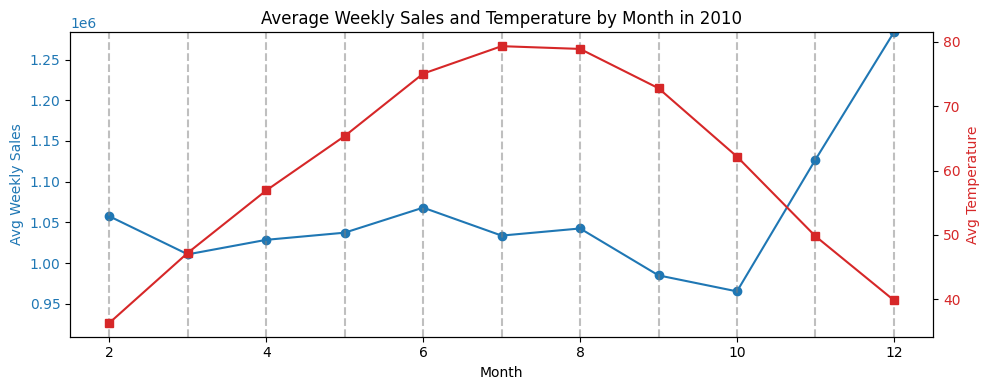

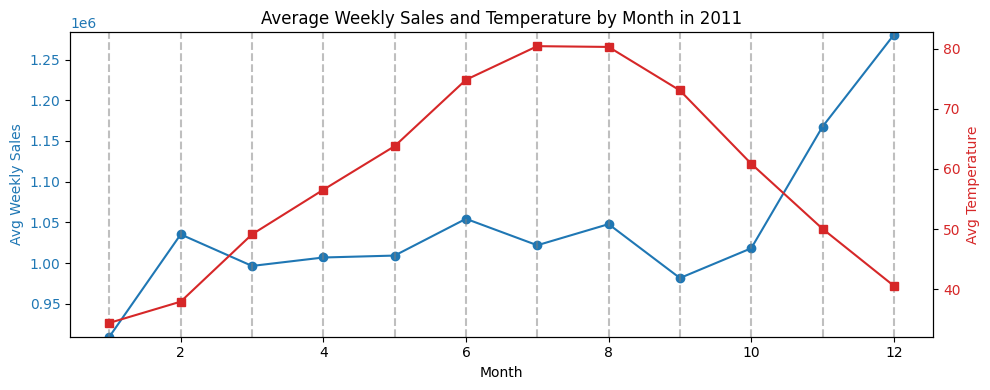

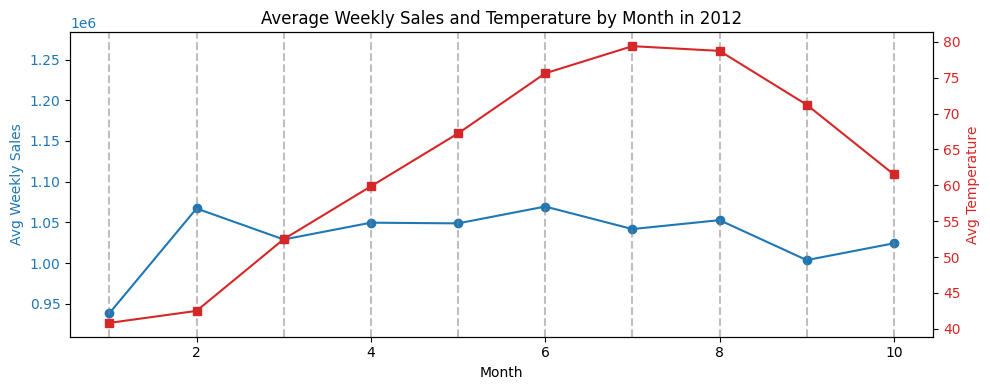

In [32]:
# Step 1: Calculate global min and max for sales
monthly_sales = df.groupby(['year', 'month'])['Weekly_Sales'].mean().reset_index()
min_sales = monthly_sales['Weekly_Sales'].min()
max_sales = monthly_sales['Weekly_Sales'].max()

years = df['year'].unique()
for year in years:
    data = df[df['year'] == year].groupby('month').agg({
        'Weekly_Sales': 'mean',
        'Temperature': 'mean'
    }).reset_index()

    fig, ax1 = plt.subplots(figsize=(10, 4))

    color1 = 'tab:blue'
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Avg Weekly Sales', color=color1)
    ax1.plot(data['month'], data['Weekly_Sales'], color=color1, marker='o', label='Weekly Sales')
    ax1.tick_params(axis='y', labelcolor=color1)
    ax1.set_ylim(min_sales, max_sales)  # <-- Set common y-axis limits
    
    for m in data['month'].unique():
        ax1.axvline(x=m, color='gray', linestyle='--', alpha=0.5)

    ax2 = ax1.twinx()
    color2 = 'tab:red'
    ax2.set_ylabel('Avg Temperature', color=color2)
    ax2.plot(data['month'], data['Temperature'], color=color2, marker='s', label='Temperature')
    ax2.tick_params(axis='y', labelcolor=color2)

    plt.title(f'Average Weekly Sales and Temperature by Month in {year}')
    fig.tight_layout()
    plt.show()

We can see that the fuel prices have increased significantly after 2010. Another thing to notice is that the price is maximum around Apr and May.

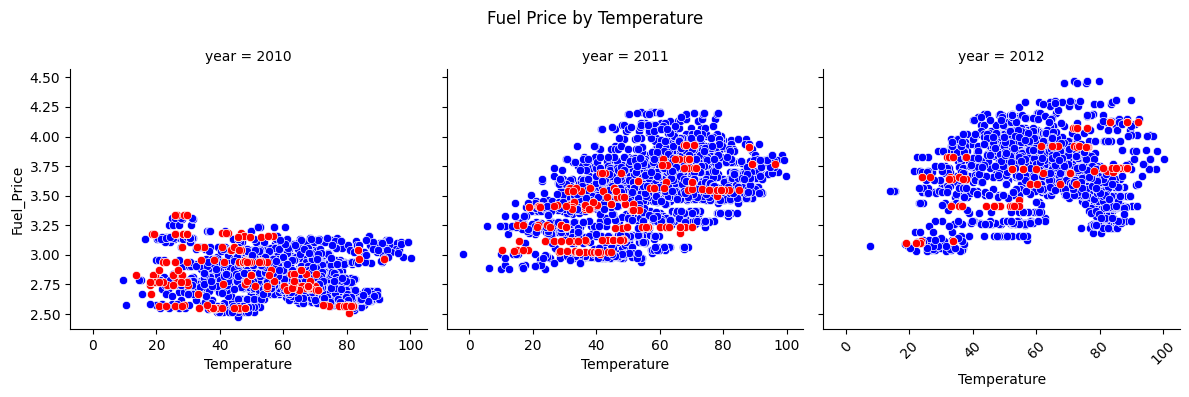

In [20]:
grid = sns.FacetGrid(df, col='year', col_wrap=3, height=4, hue='Holiday_Flag', palette={0: 'blue', 1: 'red'})
grid.map(sns.scatterplot, 'Temperature', 'Fuel_Price')
plt.xticks(rotation=45)

grid.figure.suptitle('Fuel Price by Temperature')
grid.figure.tight_layout()
plt.show()

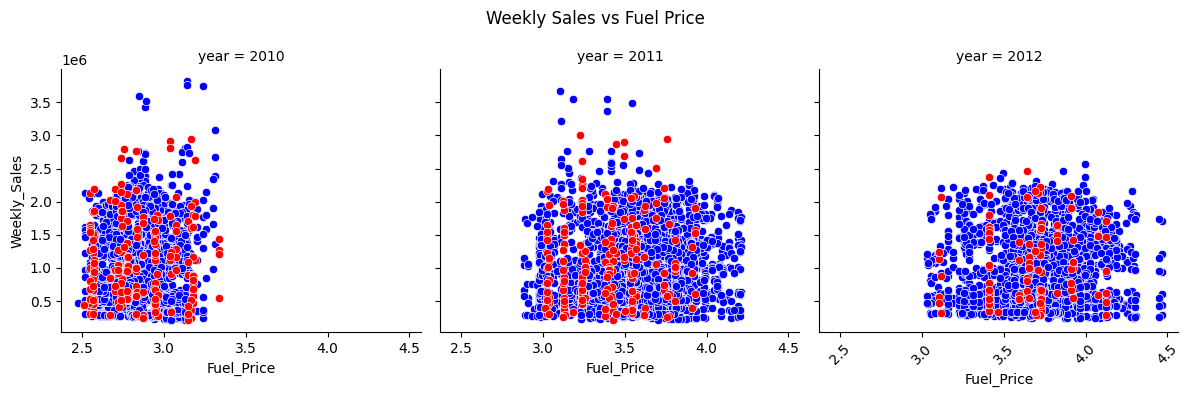

In [21]:
grid = sns.FacetGrid(df, col='year', col_wrap=3, height=4, hue='Holiday_Flag', palette={0: 'blue', 1: 'red'})
grid.map(sns.scatterplot, 'Fuel_Price', 'Weekly_Sales')
plt.xticks(rotation=45)

grid.figure.suptitle('Weekly Sales vs Fuel Price')
grid.figure.tight_layout()
plt.show()

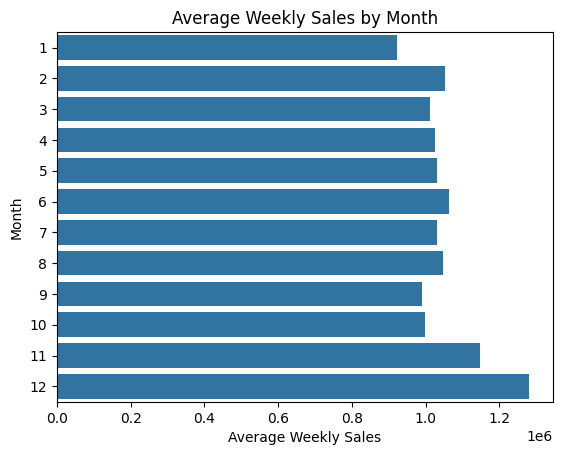

In [39]:
per_month = df.groupby('month').agg({'Weekly_Sales': 'mean'}).reset_index()

sns.barplot(data=per_month, x='Weekly_Sales', y='month', orient='h')
plt.title('Average Weekly Sales by Month')
plt.xlabel('Average Weekly Sales')
plt.ylabel('Month')
plt.show()

We get more sales in Nov and Dec, mainly due to Holidays.

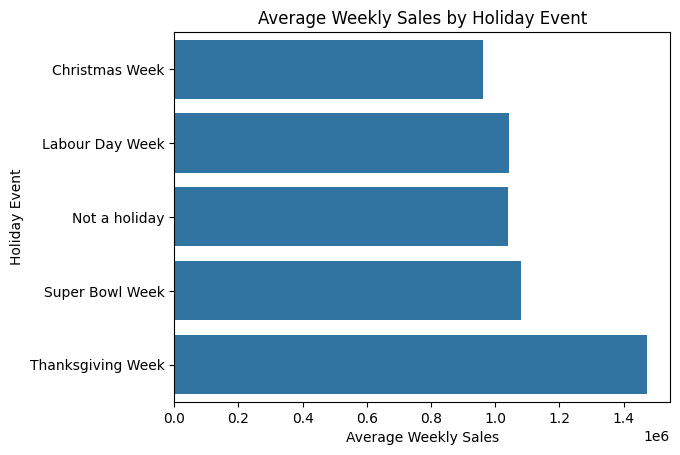

In [40]:
per_holiday = df.groupby('Holiday_Event').agg({'Weekly_Sales': 'mean'}).reset_index()

sns.barplot(data=per_holiday, x='Weekly_Sales', y='Holiday_Event', orient='h')
plt.title('Average Weekly Sales by Holiday Event')
plt.xlabel('Average Weekly Sales')
plt.ylabel('Holiday Event')
plt.show()

We can see that Thanksgivings holidays have significantly more sales compared to other holidays.

Also, Sales in christmas and labour day week is even less then a normal week.

In [51]:
df['Date'] = pd.to_datetime(df['Date'])

# Week of month calculation
df['week_of_month'] = df['Date'].apply(lambda d: (d.day - 1) // 7 + 1)

# Example: see the first few
df[['Date', 'week_of_month']].head()

,Date,week_of_month
0,2010-02-05,1
1,2010-02-12,2
2,2010-02-19,3
3,2010-02-26,4
4,2010-03-05,1


<Axes: >

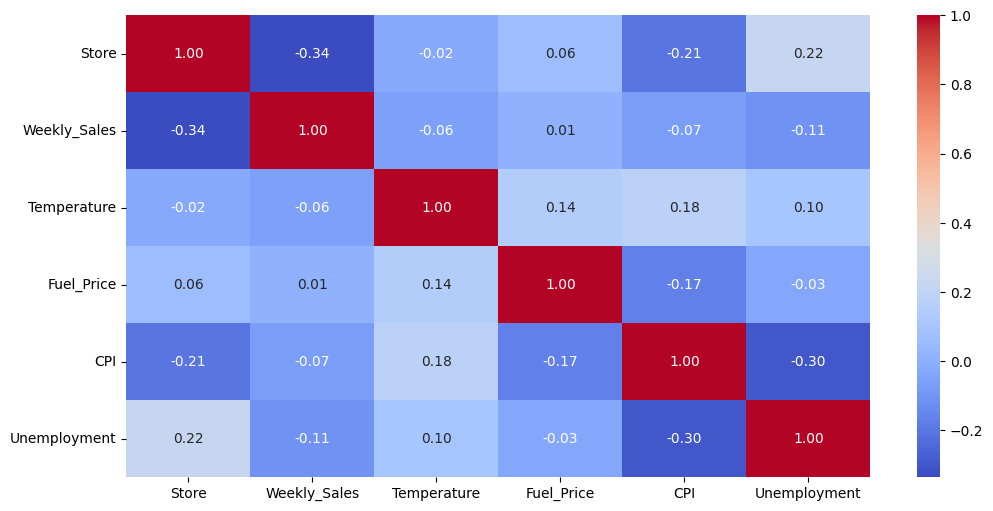

In [56]:
plt.figure(figsize=(12, 6))
sns.heatmap(df[num_features].corr(), annot=True, fmt='.2f', cmap='coolwarm')

Surprisinly, none of the features have high correlation with sales.